# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

### Exercise 11.1

In order to make practice with NN, explore how does the linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

In [76]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# generate training inputs
np.random.seed(0)
Ntrain = 1000
Nvalid = 100
x_train = np.random.uniform(-1, 1, Ntrain)
x_valid = np.random.uniform(-1, 1, Nvalid)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.1 # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

In [78]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [79]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
batch = 32
epoch = 25
history = model.fit(x=x_train, y=y_train, 
          batch_size=batch, epochs=epoch,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/25
32/32 [==============================] - 0s 6ms/step - loss: 3.4330 - mse: 3.4330 - val_loss: 2.8508 - val_mse: 2.8508
Epoch 2/25
32/32 [==============================] - 0s 2ms/step - loss: 2.0389 - mse: 2.0389 - val_loss: 1.7772 - val_mse: 1.7772
Epoch 3/25
32/32 [==============================] - 0s 2ms/step - loss: 1.2680 - mse: 1.2680 - val_loss: 1.1297 - val_mse: 1.1297
Epoch 4/25
32/32 [==============================] - 0s 2ms/step - loss: 0.8010 - mse: 0.8010 - val_loss: 0.7368 - val_mse: 0.7368
Epoch 5/25
32/32 [==============================] - 0s 2ms/step - loss: 0.5191 - mse: 0.5191 - val_loss: 0.4823 - val_mse: 0.4823
Epoch 6/25
32/32 [==============================] - 0s 2ms/step - loss: 0.3379 - mse: 0.3379 - val_loss: 0.3173 - val_mse: 0.3173
Epoch 7/25
32/32 [==============================] - 0s 2ms/step - loss: 0.2213 - mse: 0.2213 - val_loss: 0.2118 - val_mse: 0.2118
Epoch 8/25
32/32 [==============================] - 0s 3ms/step - loss: 0.1474 - mse: 0.14

In [80]:
# return weights and biases
model.get_weights()

[array([[1.986828]], dtype=float32), array([1.0011939], dtype=float32)]

In [81]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Model vs valid')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 2ms/step - loss: 0.0085 - mse: 0.0085

Model vs valid
Test loss: 0.008509808219969273
Test accuracy: 0.008509808219969273


In [82]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Model vs target')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 3ms/step - loss: 6.9957e-05 - mse: 6.9957e-05

Model vs target
Test loss: 6.995708827162161e-05
Test accuracy: 6.995708827162161e-05


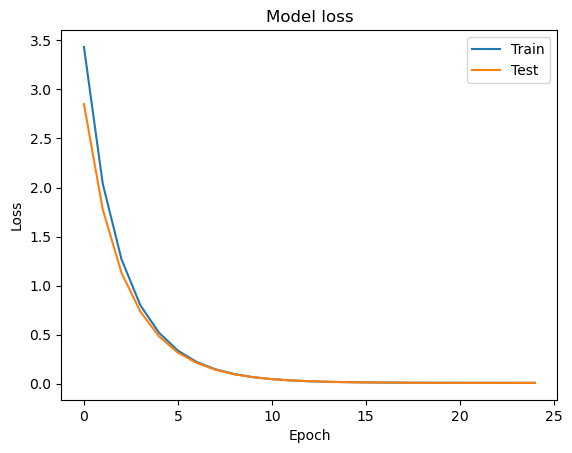

In [83]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 [==============================] - 0s 1ms/step


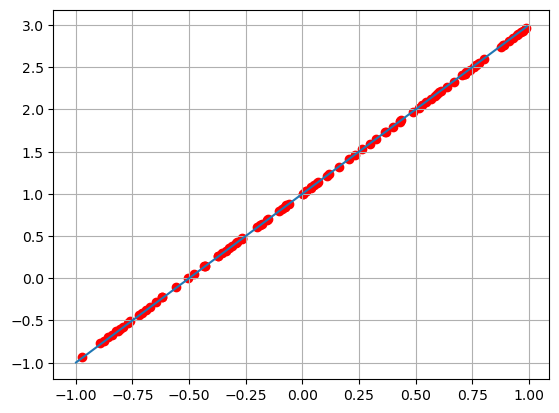

In [84]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Comments

Increasing the number of training data and epochs leads to improved precision in the fitting of the function. However, due to the semplicity of the function, the precision on both the training and validation data quickly reaches a plateau. 

Increasing the number of validation data naturally increases the loss function in the validation of the model.

Increasing the Gaussian noise the precision of the fit reduces, however, even with significant levels of the noise, the model manages to predict the data accurately, given a sufficiently large amount of training data. This is due to the fact that the noise is random and doesn't heavily impact the underlying pattern that the model needs to learn.

Utilizing the mean squared error (MSE) loss function results in a better fit compared to the fit achieved with the mean absolute error (MAE) loss function.

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In order to make practice with NN, explore reasonable different choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Make graphs comparing fits for different NNs.
Check your NN models by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

In [85]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects


# target parameters of f(x) = a*x^3 + b*x^2 + c*x +d
a = 3 
b = -2
c = -3
d = 4

In [86]:
# Generate training inputs
np.random.seed(0)
Ntrain = 2500
Nvalid = 250
x_train = np.random.uniform(-1, 1, Ntrain)
x_valid = np.random.uniform(-1, 1, Nvalid)
x_valid.sort()

# Target function f(x) = a*x^3 + b*x^2 + c*x + d
y_target = a * x_valid**3 + b * x_valid**2 + c * x_valid + d

sigma = 0.1  # Noise standard deviation
y_train = np.random.normal(a * x_train**3 + b * x_train**2 + c * x_train + d, sigma)
y_valid = np.random.normal(a * x_valid**3 + b * x_valid**2 + c * x_valid + d, sigma)

# Compose the NN model
model = keras.Sequential([
    keras.layers.Dense(8, activation='tanh', input_shape=(1,)),
    keras.layers.Dense(4, activation='tanh'),  # Output layer con 4 unità per i parametri a, b, c, d
    keras.layers.Dense(1)
])

# Compile the model choosing optimizer, loss, and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# Fit the model using training dataset
# Over 50 epochs of 32 batch size each
# Report training progress against validation data
batch = 32
epoch = 50
history = model.fit(x=x_train, y=y_train,
                    batch_size=batch, epochs=epoch,
                    shuffle=True,  # A good idea is to shuffle input before each epoch
                    validation_data=(x_valid, y_valid))

Epoch 1/50
79/79 [==============================] - 1s 5ms/step - loss: 1.4304 - mae: 0.9193 - val_loss: 0.3587 - val_mae: 0.4908
Epoch 2/50
79/79 [==============================] - 0s 3ms/step - loss: 0.3852 - mae: 0.4810 - val_loss: 0.2767 - val_mae: 0.4120
Epoch 3/50
79/79 [==============================] - 0s 3ms/step - loss: 0.3662 - mae: 0.4592 - val_loss: 0.2684 - val_mae: 0.4066
Epoch 4/50
79/79 [==============================] - 0s 2ms/step - loss: 0.3574 - mae: 0.4535 - val_loss: 0.2610 - val_mae: 0.4031
Epoch 5/50
79/79 [==============================] - 0s 2ms/step - loss: 0.3459 - mae: 0.4490 - val_loss: 0.2620 - val_mae: 0.4070
Epoch 6/50
79/79 [==============================] - 0s 2ms/step - loss: 0.3311 - mae: 0.4453 - val_loss: 0.2472 - val_mae: 0.3980
Epoch 7/50
79/79 [==============================] - 0s 2ms/step - loss: 0.3101 - mae: 0.4367 - val_loss: 0.2249 - val_mae: 0.3810
Epoch 8/50
79/79 [==============================] - 0s 3ms/step - loss: 0.2814 - mae: 0.41

In [87]:
# Evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=batch, verbose=1)

# print performance
print()
print('Model vs valid')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=batch, verbose=1)

# print performance
print()
print('Model vs target')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

8/8 [==============================] - 0s 2ms/step - loss: 0.0146 - mae: 0.0956

Model vs valid
Test loss: 0.014605587348341942
Test accuracy: 0.09564147889614105
8/8 [==============================] - 0s 2ms/step - loss: 0.0052 - mae: 0.0508

Model vs target
Test loss: 0.0051799351349473
Test accuracy: 0.050837114453315735


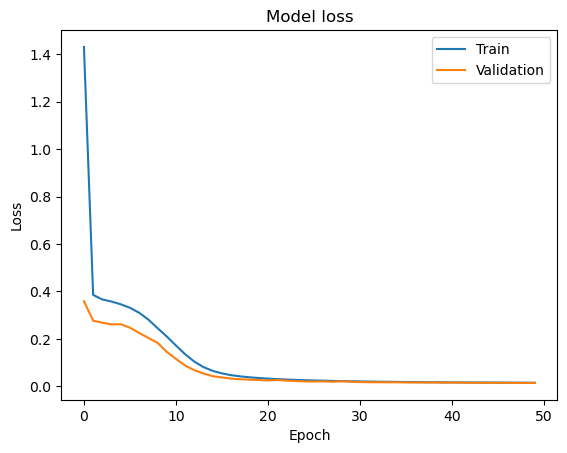

In [88]:
# Look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

4/4 [==============================] - 0s 2ms/step


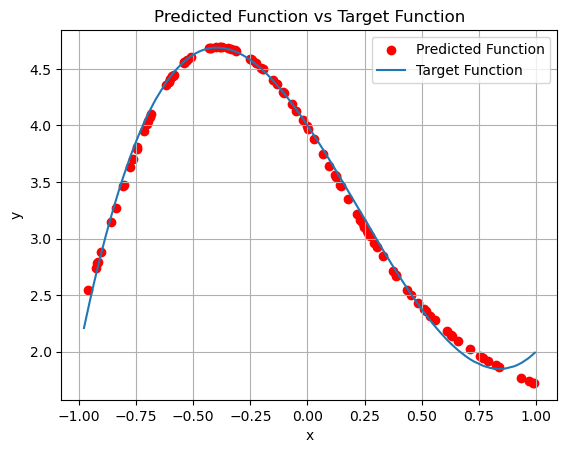

8/8 [==============================] - 0s 3ms/step - loss: 0.0246 - mae: 0.1225

Model vs valid
Test loss: 0.024551425129175186
Test accuracy: 0.12247543781995773
4/4 [==============================] - 0s 2ms/step


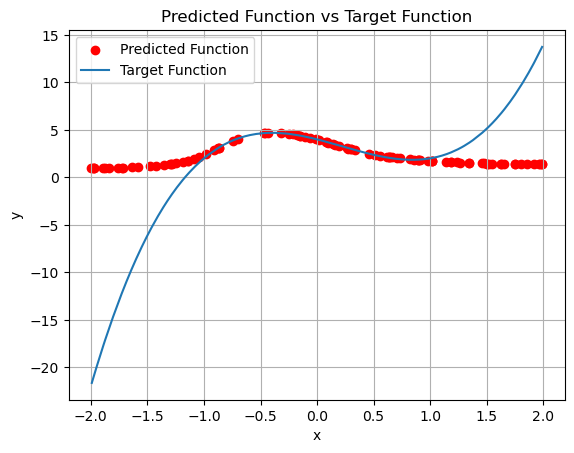

8/8 [==============================] - 0s 2ms/step - loss: 2.7236 - mae: 1.2102

Model vs valid
Test loss: 2.7235848903656006
Test accuracy: 1.210175633430481


In [89]:
x_valid = np.random.uniform(-1, 1, Nvalid)
x_valid.sort()

# Target function f(x) = a*x^3 + b*x^2 + c*x + d
y_target = a * x_valid**3 + b * x_valid**2 + c * x_valid + d

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted, color='r', label='Predicted Function')
plt.plot(x_valid, y_target, label='Target Function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Predicted Function vs Target Function')
plt.grid(True)
plt.legend()
plt.show()

# Evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=batch, verbose=1)

# print performance
print()
print('Model vs valid')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_valid = np.random.uniform(-2, 2, Nvalid)
x_valid.sort()

# Target function f(x) = a*x^3 + b*x^2 + c*x + d
y_target = a * x_valid**3 + b * x_valid**2 + c * x_valid + d

x_predicted = np.random.uniform(-2, 2, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted, color='r', label='Predicted Function')
plt.plot(x_valid, y_target, label='Target Function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Predicted Function vs Target Function')
plt.grid(True)
plt.legend()
plt.show()

# Evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=batch, verbose=1)

# print performance
print()
print('Model vs valid')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

### Comments

The model demonstrates accurate predictions within the interval where it was trained, [-1, 1], but fails to predict accurately outside this interval.

Upon experimenting with different numbers of layers and neurons, we discovered that an excessive number leads to overfitting the function. The optimal configuration was achieved with 3 layers consisting of 8, 4, and 1 neurons, respectively.

As usual, increasing the amount of training data and epochs results in a more precise fit.

The introduction of Gaussian noise does not appear to significantly impact the precision of the fit.

Further experimentation with different activation functions and optimizers revealed that tanh and ReLU outperformed sigmoid, softsign, and selu activation functions, while SGD outperformed Adam and Adagrad in terms of fitting accuracy.

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

In [90]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

# Generate training inputs
np.random.seed(0)
Ntrain = 5000
Nvalid = 500

# Generate random values for x and y within the given range
x_train = np.random.uniform(-1.5, 1.5, Ntrain)
y_train = np.random.uniform(-1.5, 1.5, Ntrain)

x_valid = np.random.uniform(-1.5, 1.5, Nvalid)
y_valid = np.random.uniform(-1.5, 1.5, Nvalid)

sigma = 0  # Noise standard deviation
# Calculate the target values f(x, y) = sin(x^2 + y^2)
z_train = np.sin(x_train**2 + y_train**2) + np.random.normal(0, sigma, size = Ntrain)
z_valid = np.sin(x_valid**2 + y_valid**2 ) + np.random.normal(0, sigma, size = Nvalid)

# Compose the NN model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(2,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model using mean squared error loss
model.compile(optimizer='adam', loss='mse')

# Fit the model using training dataset
batch_size = 50
epochs = 50
history = model.fit(x=np.column_stack((x_train, y_train)), y=z_train,
                    batch_size=batch_size, epochs=epochs,
                    validation_data=(np.column_stack((x_valid, y_valid)), z_valid))

Epoch 1/50
100/100 [==============================] - 2s 4ms/step - loss: 0.1939 - val_loss: 0.1321
Epoch 2/50
100/100 [==============================] - 0s 2ms/step - loss: 0.1123 - val_loss: 0.0868
Epoch 3/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0489 - val_loss: 0.0263
Epoch 4/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0096 - val_loss: 0.0027
Epoch 5/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 9.8851e-04 - val_loss: 8.8950e-04
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 5.6733e-04 - val_loss: 4.1436e-04
Epoch 8/50
100/100 [==============================] - 0s 3ms/step - loss: 4.2204e-04 - val_loss: 4.0954e-04
Epoch 9/50
100/100 [==============================] - 0s 3ms/step - loss: 4.3620e-04 - val_loss: 2.3956e-04
Epoch 10/50
100/100 [==============================] - 0s 3ms/step -

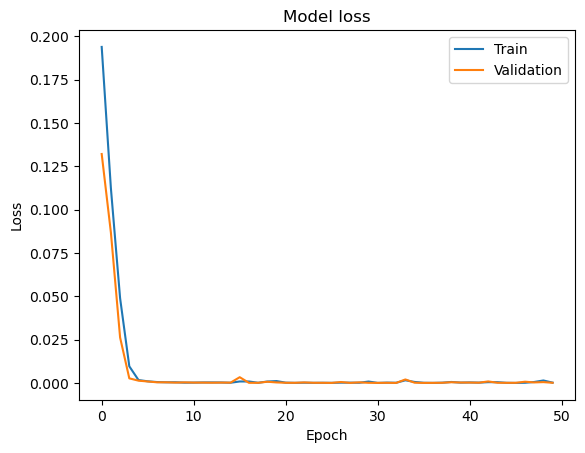

In [91]:
# Look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

313/313 [==============================] - 0s 1ms/step


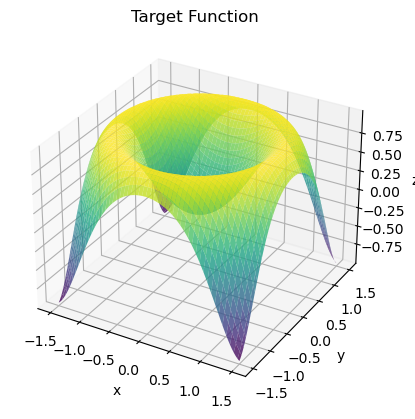

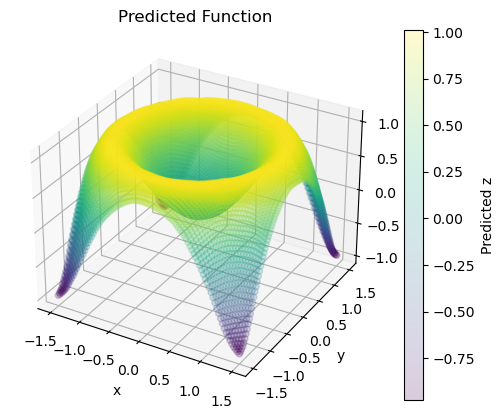

16/16 [==============================] - 0s 2ms/step - loss: 1.3357e-04

Test loss: 0.0001335718552581966


In [92]:
# Generate grid points to evaluate the function over the given range
x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-1.5, 1.5, 100)
x, y = np.meshgrid(x, y)
z = np.sin(x**2 + y**2)

# Flatten the grid points for prediction
x_flat = x.flatten()
y_flat = y.flatten()

# Predict the function values using the trained model
z_pred = model.predict(np.column_stack((x_flat, y_flat)))
z_pred = z_pred.reshape(x.shape)

# Plot the target function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none', alpha=0.8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Target Function')
plt.show()

# Scatter plot of predicted points with color mapping
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x_flat, y_flat, z_pred, c=z_pred, cmap='viridis', alpha= 0.2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Predicted Function')

# Add a colorbar to the plot
cbar = fig.colorbar(sc)
cbar.set_label('Predicted z')

plt.show()

# Evaluate the model
score = model.evaluate(np.column_stack((x_valid, y_valid)), z_valid, batch_size=32, verbose=1)
print()
print('Test loss:', score)

### Comments

In this fit we were able to enhance the complexity of the model without encountering overfitting issues.

Experimentation with different activation functions and optimizers revealed that utilizing ReLU and Adam yielded the highest fitting accuracy.

As usual, increasing the amount of training data and epochs results in a more precise fit.

The introduction of Gaussian noise has a noticeable negative impact on the precision of the fit.